In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
test = pd.read_csv("../data/titanic_test.csv")
train = pd.read_csv("../data/titanic_train.csv")

df = pd.concat([train, test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
train.info()
print("_" * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [117]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [118]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Abbott, Mrs. Stanton (Rosa Hunt)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [120]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()\
                            .sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [121]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()\
                        .sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [122]:
train[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean()\
                            .sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [123]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean()\
                            .sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


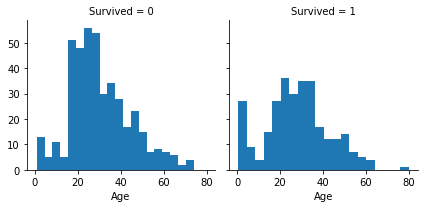

In [124]:
g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist, "Age", bins=20)

C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


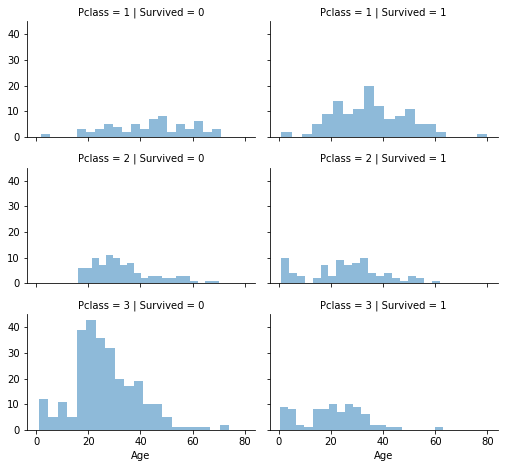

In [125]:
grid = sns.FacetGrid(train, col="Survived", row="Pclass", size=2.2, aspect=1.6)\
            .map(plt.hist, 'Age', alpha=.5, bins=20)\
            .add_legend()

C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


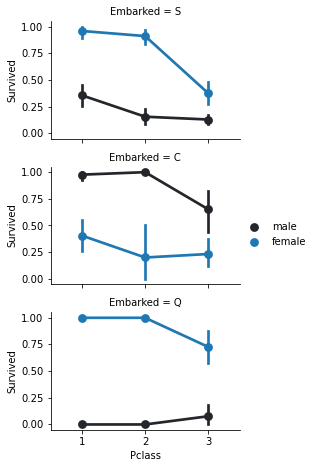

In [126]:
grid = sns.FacetGrid(train, row="Embarked", size=2.2, aspect=1.6)\
            .map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallet='deep')\
            .add_legend()

C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


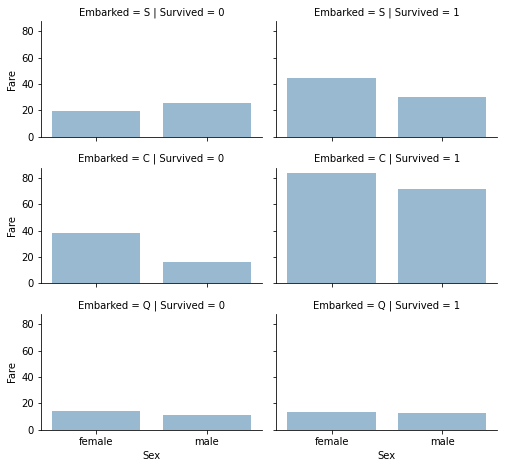

In [127]:
grid = sns.FacetGrid(train, row="Embarked", col="Survived", size=2.2, aspect=1.6)\
            .map(sns.barplot, "Sex", "Fare", alpha=.5, ci=None)\
            .add_legend()


In [128]:
train = train.drop(["Ticket", "Cabin"], axis=1)
test = test.drop(["Ticket", "Cabin"], axis=1)
df = [train, test]

In [129]:
for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [130]:
for dataset in df:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Capt", "Col", \
                                                "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

In [131]:
train[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()\
                            .sort_values(by="Survived", ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [132]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in df:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [133]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
df = [train, test]

train.shape, test.shape

((891, 9), (418, 9))

In [134]:
for dataset in df:
    dataset["Sex"] = dataset["Sex"].map({"female": 1, "male": 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\Jmana\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


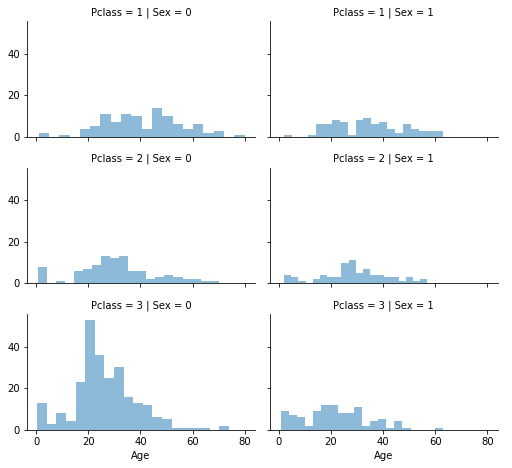

In [135]:
grid = sns.FacetGrid(train, row="Pclass", col="Sex", size=2.2, aspect=1.6)\
            .map(plt.hist, "Age", alpha=.5, bins=20)\
            .add_legend()

In [136]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [137]:
for dataset in df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset["Sex"] == i) & \
                              (dataset["Pclass"] == j + 1)]["Age"].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i, j] = int(age_guess / 0.5) * 0.5
            
    for i in range(0, 2):
                for j in range(0, 3):
                    dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), \
                               "Age"] = guess_ages[i, j]        
    
    dataset["Age"] = dataset["Age"].astype(int)
                
            
            
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [138]:
#Segmenta uma lista em categorias. Quantidade de categorias depende do segundo parametro
train["AgeBand"] = pd.cut(train["Age"], 5)

train[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean()\
                                .sort_values("AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [139]:
#Subistituindo a idade por faixa etaria

for dataset in df:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[(dataset["Age"] > 64), "Age"]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [140]:
train = train.drop(["AgeBand"], axis=1)
df = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [141]:
for dataset in df:
    dataset["FamilySize"] = dataset["SibSp"] + dataset['Parch'] + 1

In [142]:
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean()\
                                    .sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [143]:
for dataset in df:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1

train[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [144]:
train = train.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test = test.drop(["Parch", "SibSp", "FamilySize"], axis=1)

df = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [145]:
for dataset in df:
    dataset["Age*Class"] = dataset.Age * dataset.Pclass
    
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [146]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [147]:
for dataset in df:
    #dataset.loc[dataset["Embarked"].isnull(), "Embarked"] = freq_port
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

In [148]:
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()\
                                .sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [149]:
for dataset in df:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [150]:
fare_median = test.Fare.dropna().median()
fare_median

14.4542

In [151]:
#test["Fare"] = test["Fare"].fillna(fare_median)
#test.head()

In [152]:
##test.loc[test.Fare.isna(), "Fare"] = fare_median
##test.head()

In [153]:
test["Fare"].fillna(test.Fare.dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [154]:
train["FareBand"] = pd.qcut(train["Fare"], 4)
train[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean()\
                                    .sort_values(by="FareBand")

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [155]:
for dataset in df:
    dataset.loc[dataset.Fare <= 7.91, "Fare"] = 0
    dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454), "Fare"] = 1
    dataset.loc[(dataset.Fare > 14.545) & (dataset.Fare <= 31.0), "Fare"] = 2
    dataset.loc[dataset.Fare > 31.0, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

train = train.drop(["FareBand"], axis=1)
df = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [156]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [157]:
X_train = train.drop(["Survived"], axis=1)
Y_train = train["Survived"]
X_test = test.drop(["PassengerId"], axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (418, 8))

In [158]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

80.25

In [159]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,2.224869
5,Title,0.401580
2,Age,0.284416
4,Embarked,0.275692
6,IsAlone,0.060353
3,Fare,-0.114367
7,Age*Class,-0.308361
0,Pclass,-0.755679


In [161]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)

Y_pred = svc_model.predict(X_test)

acc_svc = round(svc_model.score(X_train, Y_train) * 100, 2)
acc_svc

78.79

In [163]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, Y_train)

Y_pred = model_knn.predict(X_test)
acc_knn = round(model_knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.96

In [164]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.39

In [165]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

71.72

In [166]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Jmana\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.35

In [167]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

70.48

In [168]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


87.32

In [169]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.32

In [170]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.32
8,Decision Tree,87.32
1,KNN,84.96
2,Logistic Regression,80.25
7,Linear SVC,79.35
0,Support Vector Machines,78.79
4,Naive Bayes,72.39
5,Perceptron,71.72
6,Stochastic Gradient Decent,70.48


In [173]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
#submission.to_csv('../output/submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../output/submission.csv'